In [1]:
from mdagent import MDAgent

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-10-02
time: 15:21:24


In [3]:
descriptive_prompt_4 = "Complete the following MD tasks: 1. Download the PDB file 1ZNI. 2. Pre-process the file by adding missing atoms, hydrogens, and replacing non-standard residues. 3. Simulate for 1 ps at 300 K. 4. Calculate the RMSD of the simulation."
non_descriptive_prompt_4 = "Simulate protein 1ZNI at 300 K for 1 ps and calculate the RMSD."

In [4]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
print("ckpt_dir:",agent_1.path_registry.ckpt_dir)

ckpt_dir: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_94


##### descriptive prompt

In [6]:
start1 = datetime.datetime.now()
agent_1.run(descriptive_prompt_4)

Thought: First, I need to download the PDB file 1ZNI.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1ZNI"
}
```
PDB file found with this ID: 1ZNI
Next, I need to pre-process the PDB file by adding missing atoms, hydrogens, and replacing non-standard residues.
Action:
```
{
  "action": "CleaningToolFunction",
  "action_input": {
    "pdb_id": "1ZNI_152139",
    "replace_nonstandard_residues": true,
    "add_missing_atoms": true,
    "remove_heterogens": false,
    "remove_water": false,
    "add_hydrogens": true,
    "add_hydrogens_ph": 7.0
  }
}
```file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_94/pdb/1ZNI_raw_20241002_152139.pdb
Now, I need to simulate the pre-processed PDB file for 1 ps at 300 K.
Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI_152143",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
    

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

 1ZNI

.
Action

:
```
{


  "action":

 "PDBFile

Downloader",
  "

action_input": "

1ZNI"


}
```


PDB file found with this ID: 1ZNI


Next,

 I need to pre

-process the PDB

 file by adding missing

 atoms, hydrogens

, and replacing non

-standard residues.
Action

:
```
{


  "action":

 "CleaningToolFunction

",
  "action

_input": {
   

 "pdb_id":

 "1ZNI

_111138",


    "replace_non

standard_residues

": true,


    "add_missing

_atoms": true,


    "remove_h

eterogens": false

,


    "remove_water

": false,
   

 "add_hydrogens": true,


    "add_h

ydrogens_ph":

 7.0


  }
}


```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_73/pdb/1ZNI_raw_20241001_111138.pdb


Now,

 I

 need to simulate the

 pre-processed PDB file for 

1 ps at 

300 K.
Action:
```
{


  "action":

 "SetUpandRun

Function",
  "

action_input": {


    "pdb_id

": "1Z

NI_111142",
    "force

field_files": ["amber99sbild

n.xml"],
    "save": true

,
    "system_params": {
     

 "nonbondedMethod": "No

Cutoff",
      "constraints":

 "None",
      "rigidWater

": false
    },
    "integr

ator_params": {
      "integrator

_type": "L

angevinMiddle",


      "Temperature": "300 * kel

vin",
      "

Friction": "1.0 /

 picoseconds",
     

 "Timestep":

 "0.002

 * picoseconds",


      "Pressure":

 "1.0

 * bar"
   

 },
    "simulation

_params": {
     

 "Ensemble": "NVT",


      "Number of

 Steps": 500,


 "record_interval_steps

": 100,


      "record_params

": ["step",

 "potentialEnergy",

 "temperature"]
   

 }
  }
}


```

Building system...
About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: ZN
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed due to a missing

 template for residue 103 (ZN).

 This is likely

 because the force field used (

amber99sbildn.xml) does

 not contain a template

 for this residue. To fix

 this, I need to add a

 force field

 that includes a template for ZN

.

Action:
```
{


  "action": "SetUpand

RunFunction",
  "action_input":

 {
    "pdb_id": "1

ZNI_111142",
    "

forcefield_files": ["amber99sb

ildn.xml",

 "zn.xml"],
    "save

": true,
    "system_params":

 {
      "nonbondedMethod":

 "NoCutoff",
      "constraints

": "None",
      "rigid

Water": false
    },
    "

integrator_params": {
      "integr

ator_type": "LangevinMiddle

",
      "Temperature": "300 *

 kelvin",
      "Friction":

 "1.0 / picoseconds",


      "Timestep": "0.

002 * picoseconds",
      "Pressure

": "1.0 * bar"


    },
    "simulation_params": {


      "Ensemble": "NVT

",
      "Number of Steps": 

500,
      "record_interval_steps":

 100,
      "record_params":

 ["step", "potentialEnergy", "

temperature"]
    }
  }
}
```

error found: The forcefield file is not present
 Correct this and try again. 
 Everthing else is fine


Thought:

 The simulation failed again due

 to

 the missing force field file "zn

.xml". I need to correct this

 by providing the correct path

 to the force field file or by

 using a different force field that

 includes a template for ZN.

Action

:
```
{
  "action":

 "SetUpandRunFunction",
  "

action_input": {
    "pdb_id

": "1ZNI_111142

",
    "forcefield_files": ["

amber99sbildn.xml", "

tip3

p.xml"],
    "save": true

,
    "system_params": {
     

 "nonbondedMethod": "No

Cutoff",
     

 "constraints": "

None",
      "rigidWater":

 false
    },
    "integrator

_params": {
      "integrator_type

": "LangevinMiddle",
     

 "Temperature": "300 * kelvin

",
      "Friction": "1

.0 / picoseconds",
      "

Timestep": "0.002 *

 picoseconds",
     

 "Pressure": "1.0 *

 bar"
    },
    "simulation_params

": {
      "

Ensemble": "NVT",
     

 "Number of Steps": 500,


      "record_interval_steps": 100

,
      "record

_params": ["step", "potentialEnergy

", "temperature"]
    }
  }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: ZN
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed again due to the

 missing template for residue 

103 (ZN). This is

 likely because the force fields

 used (amber99sb

ildn.xml and tip3p.xml

) do not contain a template for this

 residue. To fix this, I need

 to use a different force

 field that includes a template for ZN

 or modify the

 existing force field to include the

 missing template.

Action:
``

`
{
  "action": "SetUp

andRunFunction",
  "action_input

": {
    "pdb_id": "

1ZNI_111142",
   

 "forcefield_files": ["amber14

/protein

.ff14SB.xml", "amber14

/zn.xml

"],
    "save": true,
   

 "system_params": {
      "non

bondedMethod": "NoCutoff

",
      "constraints": "None",


      "rigidWater": false


    },
    "integrator_params":

 {
      "integrator_type": "

LangevinMiddle",
      "Temperature

": "300 * kelvin",
     

 "Friction": "1.0

 / picoseconds",
      "Timestep

": "0.002 * picoseconds

",
      "Pressure": "1.

0 * bar"
    },
    "

simulation_params": {
      "Ensemble

": "NVT",
      "Number

 of Steps": 500,
      "

record_interval_steps": 100,
     

 "record_params": ["step", "

potentialEnergy", "temperature"]
    }


  }
}
```

error found: The forcefield file is not present
 Correct this and try again. 
 Everthing else is fine


Thought:

 The simulation failed again due to the

 missing force field file "amber14/

zn.xml". I need to correct this

 by providing the correct path to the force

 field file or by using a different force

 field that includes a template for ZN

.

Action:
```
{
  "

action": "SetUpandRunFunction",


  "action_input": {
    "

pdb_id": "1ZNI_

111142",
    "forcefield_files

": ["amber14/protein.ff14

SB.xml", "amber14/zn

.xml"],
    "save

": true,
    "system_params":

 {
      "nonbondedMethod":

 "NoCutoff",
      "constraints

": "None",
      "rigid

Water": false
    },
    "

integrator_params": {
      "integr

ator_type": "LangevinMiddle

",
      "Temperature": "300 *

 kelvin",
      "Friction":

 "1.0 / picoseconds",


      "Timestep": "0.

002 * picoseconds",
      "Pressure

": "1.0 * bar"


    },
    "simulation_params": {


      "Ensemble": "NVT

",
      "Number of Steps": 

500,
      "record_interval_steps":

 100,
      "record_params":

 ["step", "potentialEnergy", "

temperature"]
    }
  }
}
```

error found: The forcefield file is not present
 Correct this and try again. 
 Everthing else is fine


Thought:

 The simulation failed again due to the

 missing force field file "amber14/

zn.xml". I need to correct this

 by providing the correct path to the force

 field file or by

 using a different force field that includes a

 template for ZN.

Action:
``

`
{
  "action": "SetUp

andRunFunction",
  "action_input

": {
    "pdb_id": "

1ZNI_111142",
   

 "forcefield_files

": ["amber14

/protein.ff14SB.xml"],
   

 "save": true,
    "system

_params": {
      "nonbonded

Method": "NoCutoff",
     

 "constraints": "None",
      "

rigidWater": false
    },


    "integrator_params": {
     

 "integrator_type": "Lange

vinMiddle",
      "Temperature": "

300 * kelvin",
      "Fr

iction": "1.0 / pic

oseconds",
      "Timestep": "

0.002 * picoseconds",
     

 "Pressure": "1.0 *

 bar"
    },
    "simulation_params

": {
      "Ensemble": "

NVT",
      "Number of Steps

": 500,
      "record_interval

_steps": 100,
      "record

_params": ["step", "potentialEnergy

", "temperature"]
    }
  }


}
```

Building system...
About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: ZN
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed

 again due to the

 missing template for residue

 103 (ZN

). This is likely

 because the force field

 used (amber14

/protein.ff14

SB.xml) does

 not contain a template

 for this residue.

 To fix this,

 I need to use

 a different force field

 that includes a template

 for ZN or

 modify the existing force

 field to include the

 missing template.

Action

:
```
{


  "action":

 "SetUpandRun

Function",
  "

action_input": {


    "pdb_id

": "1Z

NI_111142

",
    "force

field_files": ["

amber14/pro

tein.ff14SB

.xml", "tip

3

p.xml"],
   

 "save": true

,
    "system

_params": {
     

 "nonbonded

Method": "No

Cutoff",
     

 "constraints": "

None",
      "

rigidWater": false
    },


    "integrator

_params": {
     

 "integrator_type

": "Lange

vinMiddle",
     

 "Temperature": "

300 * kelvin

",
      "Fr

iction": "1

.0 / pic

oseconds",
      "

Timestep": "

0.002 *

 picoseconds",
     

 "Pressure": "

1.0 *

 bar"
    },


    "simulation_params

": {
      "

Ensemble": "

NVT",
     

 "Number of Steps

": 500,


      "record_interval

_steps": 100

,
      "record

_params": ["step

", "potentialEnergy

", "temperature"]


    }
  }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: ZN
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed

 again due to the

 missing template for residue

 103 (ZN

). This is likely

 because the force fields

 used (amber14

/protein.ff14

SB.xml and tip

3p.xml)

 do not contain a

 template for this residue

. To fix this

, I need to

 use a different force

 field that includes a

 template for ZN

 or modify the existing

 force field to include

 the missing template.



Action:
```


{
  "action

": "SetUpand

RunFunction",
 

 "action_input":

 {
    "pdb

_id": "1

ZNI_111

142",
    "

forcefield_files":

 ["amber14/pro

tein.ff14SB

.xml", "tip

3

p.xml", "

zn.xml

"],
    "save

": true,
   

 "system_params":

 {
      "non

bondedMethod":

 "NoCutoff

",
      "constraints

": "None",


      "rigid

Water": false


    },
    "

integrator_params":

 {
      "integr

ator_type": "

LangevinMiddle

",
      "Temperature

": "300 *

 kelvin",
     

 "Friction":

 "1.0

 / picoseconds",


      "Timestep

": "0.

002 * picoseconds

",
      "Pressure

": "1.

0 * bar"


    },
    "

simulation_params": {


      "Ensemble

": "NVT

",
      "Number

 of Steps": 

500,
      "

record_interval_steps":

 100,
     

 "record_params":

 ["step", "

potentialEnergy", "

temperature"]
    }


  }
}
```

error found: The forcefield file is not present
 Correct this and try again. 
 Everthing else is fine


Thought:

 The simulation failed

 again due to the

 missing force field file

 "zn.xml".

 I need to correct

 this by providing the

 correct path to the

 force field file or

 by using a different

 force field that includes

 a template for Z

N.

Action:


```
{
 

 "action": "

SetUpandRunFunction

",
  "action

_input": {
   

 "pdb_id":

 "1ZNI

_111142",


    "forcefield

_files": ["amber

14/protein.ff

14SB.xml",

 "tip3

p.xml"],
   

 "save": true

,
    "system

_params": {
     

 "nonbonded

Method": "No

Cutoff",
     

 "constraints": "

None",
      "

rigidWater":

 false
    },


    "integrator

_params": {
     

 "integrator_type

": "Lange

vinMiddle",
     

 "Temperature": "

300 * kelvin

",
      "Fr

iction": "1

.0 / pic

oseconds",
      "

Timestep": "

0.002 *

 picoseconds",
     

 "Pressure": "

1.0 *

 bar"
    },


    "simulation_params

": {
      "

Ensemble": "

NVT",
     

 "Number of Steps

": 500,


      "record_interval

_steps": 100

,
      "record

_params": ["step

", "potentialEnergy

", "temperature"]


    }
  }


}
```


Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: ZN
Residue code not in solvent list. Adding forcefield                         not supported.


ServiceUnavailableError: {'error': {'object': 'error', 'type': 'internal_server_error', 'message': 'Service Unavailable'}}

In [7]:
end = datetime.datetime.now()
elapsed = end - start1
print(f"agent_1 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_1 duration: 2.27 minutes


In [11]:
registry = agent_1.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1ZNI_152139: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_152139
 1ZNI_152143: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 


In [13]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", paths_and_descriptions)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

AttributeError: 'NoneType' object has no attribute 'group'

In [14]:
# from IPython.display import Image
# Image(filename=plot_path)

##### non-descriptive prompt

In [13]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
print("ckpt_dir:",agent_2.path_registry.ckpt_dir)
start2 = datetime.datetime.now()
agent_2.run(non_descriptive_prompt_4)

ckpt_dir: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_74


Thought:

 First,

 I need to download

 the PDB file for protein 1

ZNI.
Action

:
```
{


  "action":

 "PDBFile

Downloader",
  "

action_input": "

1ZNI"


}
```

PDB file found with this ID: 1ZNI


Next,

 I need to set

 up and run a

 short simulation of the

 protein 1

ZNI at 

300 K for 

1 ps.

Action

:
```
{


  "action":

 "SetUpandRun

Function",
  "

action_input": {


 "pdb_id":

 "1ZNI

_111303",


    "forcefield

_files": ["amber

99sbildn

.xml"],
    "

save": true,


    "system_params

": {
      "

nonbondedMethod

": "NoC

utoff",
      "

constraints":

 "None",
     

 "rigidWater

": false


    },
    "

integrator_params":

 {
      "integr

ator_type": "

LangevinMiddle

",
      "Temperature

": "300 *

 kelvin",
      "Friction":

 "1.0 / picoseconds",


      "Timestep

": "0.

002 * picoseconds

",
     

 "Pressure": "1.0 *

 bar"
    },


    "simulation_params

": {
      "

Ensemble": "

NVT",
     

 "Number of Steps

": 500,


      "record_interval_steps": 100

,
      "record_params

": ["step

", "potentialEnergy

", "temperature"]
    }
  }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: GLY
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed due

 to

 missing hydrogen

 atoms in the

 residue GLY.

 I need to add

 the

 missing hydrogen atoms to

 the PDB file

 before running the simulation

.

Action:
``

`
{
  "

action": "Cleaning

ToolFunction",
 

 "action_input":

 {
    "pdb

_id": "1

ZNI_111

303",
    "

replace_nonstandard_res

idues": true

,
    "add

_missing_atoms": true

,
    "remove

_heterogens":

 true,
    "

remove_water": true

,
    "add

_hydrogens":

 true,
    "

add_hydrogens_ph": 7

.0
 

 }
}
```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_74/pdb/1ZNI_raw_20241001_111303.pdb


Thought:

 Now that the PDB file has

 been cleaned and the

 missing hydrogen atoms have

 been added, I

 can set up and

 run a short

 simulation of the protein 1ZNI

 at 300 K for 1 ps

.

Action:
```
{
  "

action": "SetUpandRunFunction",


  "action_input": {
    "

pdb_id": "1ZNI_

111311",
   

 "forcefield_files": ["amber99

sbildn.xml

"],
    "save

": true,
    "system_params":

 {
      "nonbondedMethod":

 "NoCutoff",
      "constraints

": "None",
      "rigid

Water": false
    },
    "

integrator_params": {
      "integr

ator_type": "

LangevinMiddle",
      "Temperature

": "300 *

 kelvin",
     

 "Friction":

 "1.0

 / picoseconds",


      "Timestep

": "0.

002 * picoseconds",
      "Pressure

": "1.0 * bar"


    },
    "simulation_params": {


      "Ensemble

": "NVT

",
      "Number of Steps": 

500,
      "record_interval_steps":

 100,
     

 "record_params":

 ["step", "

potentialEnergy", "

temperature"]
    }


  }
}
```

Building system...
About to create system...
Attempts at creating system: 0/3
adding system without solvent


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b908fbc3630> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_74/simulations/NVT_1ZNI_111311_20241001_111315.py
['TRAJ_sim0_111315_1ZNI_111311_20241001_111316.dcd', 'TRAJ_sim0_073920_4RMB_022316_20241001_073921.dcd', 'LOG_sim0_073920_4RMB_022316_20241001_073921.txt', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'LOG_sim0_111315_1ZNI_111311_20241001_111316.txt', 'prompt2.ipynb', 'out.405b_robust_exp_v2', 'results', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'TOP_sim0_111315_1ZNI_111311_20241001_111316.pdb', '405b_robust_exp.sh', 'prompt5.ipynb', 'TOP_sim0_073920_4RMB_022316_20241001_073921.pdb', 'out.405b_robust_exp']


Thought:

 Now that the

 simulation has been successfully run

, I need to

 calculate the RMSD of the protein 

1ZNI.



Action

:
```
{
  "action":

 "ComputeRMS

D",
  "action_input": {


    "top_id": "top_sim

0_111315",
    "tr

aj_id": "rec0_111

316",
    "ref_top_id":

 "top_sim0_111315",


    "ref_traj

_id": "rec

0_111316

",
    "select

": "protein",
    "mol_name

": "1ZNI"
  }


}
```

Calculating RMSD...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_74/records/rmsd_1ZNI.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_74/figures/FIG_rmsd_1ZNI_20241001_111332.png


Thought:

 The RMS

D calculation was successful

, and the results

 are saved in a

 CSV file

 with the ID

 "rms

d_1Z

NI" and a plot with the ID

 "fig0_111332". I

 can now

 provide the final answer.

Action:
``

`
{
  "action": "Final

 Answer",
  "

action_input": "

The RMSD of

 protein 1Z

NI at 

300 K for 

1 ps is calculated

 and saved in a CSV

 file with the ID 'rmsd_

1ZNI' and a plot with

 the ID 'fig0_111332

'."
}
```

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [14]:
end = datetime.datetime.now()
elapsed = end - start2
print(f"agent_2 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_2 duration: 0.56 minutes


In [15]:
registry = agent_2.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_111303, 1ZNI_111311, top_sim0_111315, sim0_111315, rec0_111316, rec1_111316, rec2_111316, rmsd_1ZNI, fig0_111332


In [16]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1ZNI_111303: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_111303
 1ZNI_111311: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_111315: Initial positions for simulation sim0_111315
 sim0_111315: Basic Simulation of Protein 1ZNI_111311
 rec0_111316: Simulation trajectory for protein 1ZNI_111311 and simulation sim0_111315
 rec1_111316: Simulation state log for protein 1ZNI_111311 and simulation sim0_111315
 rec2_111316: Simulation pdb frames for protein 1ZNI_111311 and simulation sim0_111315
 rmsd_1ZNI: RMSD for 1ZNI
 fig0_111332: RMSD plot for 1ZNI


In [17]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

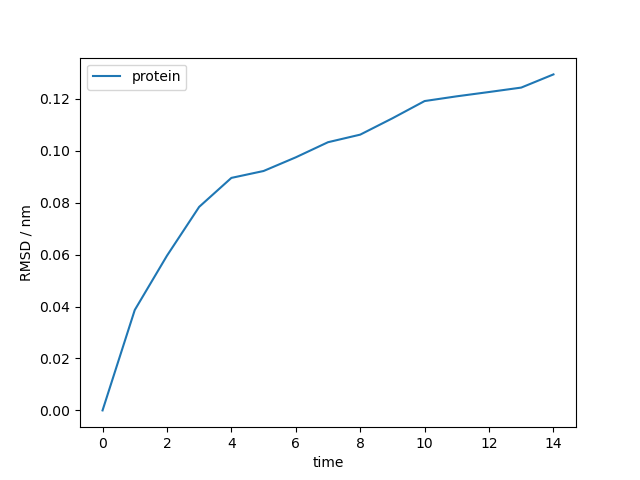

In [18]:
from IPython.display import Image
Image(filename=plot_path)